[Dataset Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) 

In [2]:
import kagglehub

path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

import os 
print(os.listdir(path))

Path to dataset files: C:\Users\Xeyyam\.cache\kagglehub\datasets\pavansubhasht\ibm-hr-analytics-attrition-dataset\versions\1
['WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [3]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "WA_Fn-UseC_-HR-Employee-Attrition.csv"))
pd.set_option("display.max_columns", None)
df 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [4]:
# import openpyxl
# df.to_excel("hr_data.xlsx", index=False)

# df.to_json("HR_Data.json", orient="records", indent=4)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Kateqorial sütunlar ({len(categorical_cols)}): {categorical_cols}")

Kateqorial sütunlar (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [11]:
for col in categorical_cols:
    print(f"\n{df[col].value_counts()}")


Attrition
No     1233
Yes     237
Name: count, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Gender
Male      882
Female    588
Name: count, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

Over18
Y    1470
Name

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
df.duplicated().sum()

np.int64(0)

## Ayrılma Nisbəti

In [14]:
# Ayrılma statistikası
attrition_counts = df['Attrition'].value_counts()
attrition_percent = df['Attrition'].value_counts(normalize=True) * 100

print(f"  Ayrıldı (Yes):     {attrition_counts['Yes']}  ({attrition_percent['Yes']:.1f}%)")
print(f"  Qaldı (No):        {attrition_counts['No']}  ({attrition_percent['No']:.1f}%)")


  Ayrıldı (Yes):     237  (16.1%)
  Qaldı (No):        1233  (83.9%)


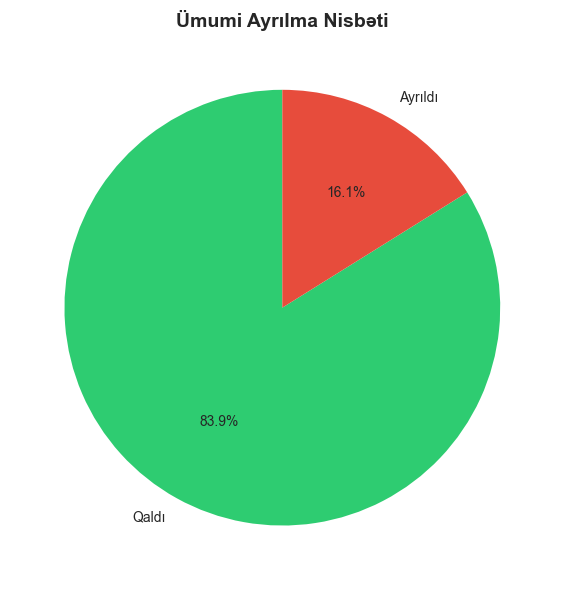

In [15]:
plt.figure(figsize=(12,6))
colors = ['#2ecc71', '#e74c3c']

plt.pie(attrition_percent, labels=['Qaldı', 'Ayrıldı'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Ümumi Ayrılma Nisbəti', fontsize = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

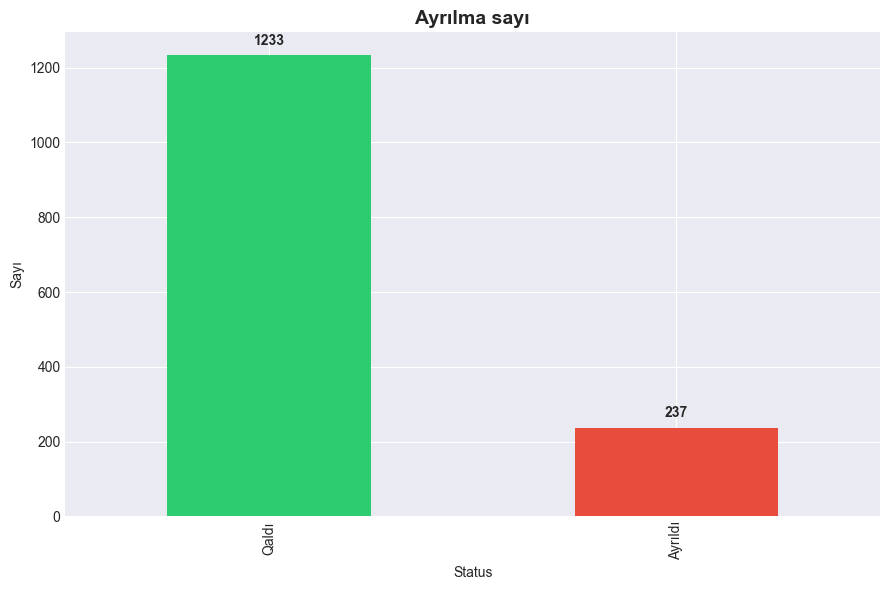

In [16]:
plt.figure(figsize=(9,6))
colors = ['#2ecc71', '#e74c3c']

attrition_counts.plot(kind='bar', color=colors)
plt.title('Ayrılma sayı', fontsize=14, fontweight='bold')
plt.xlabel('Status')
plt.ylabel('Sayı')
plt.xticks(ticks=[0, 1], labels=['Qaldı', 'Ayrıldı'])
for i, v in enumerate(attrition_counts):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## Demoqrafik Təhlil

In [17]:
print(f"Orta Yaş: {df['Age'].mean():.1f} il")
print(f"Median Yaş: {df['Age'].median():.1f} il")
print(f"Yaş aralığı: {df['Age'].min()} - {df['Age'].max()} il")
print(f"Standart Sapma: {df['Age'].std():.1f}")

Orta Yaş: 36.9 il
Median Yaş: 36.0 il
Yaş aralığı: 18 - 60 il
Standart Sapma: 9.1


In [18]:
print(f"Ayrılanların orta yaşı: {df[df['Attrition']=='Yes']['Age'].mean():.1f} il")
print(f"Qalanların orta yaşı: {df[df['Attrition']=='No']['Age'].mean():.1f} il")

Ayrılanların orta yaşı: 33.6 il
Qalanların orta yaşı: 37.6 il


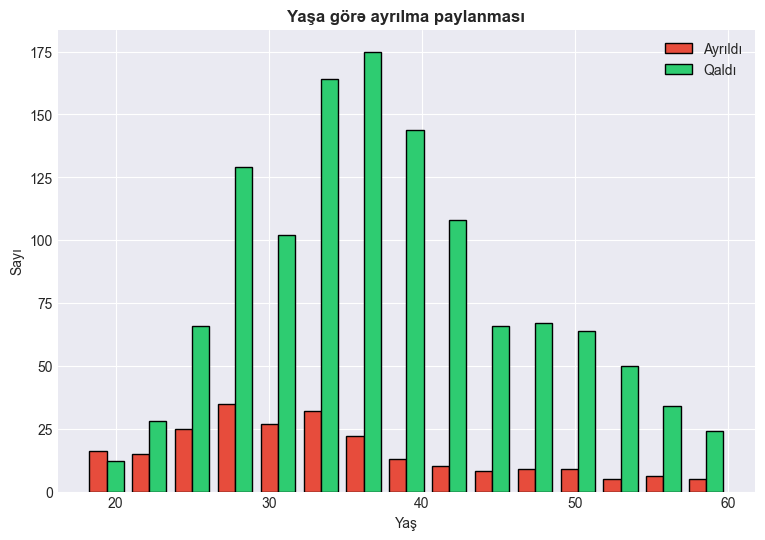

In [19]:
plt.figure(figsize=(9,6))
plt.hist([df[df['Attrition']=='Yes']['Age'], df[df['Attrition']=='No']['Age']], bins=15, label=['Ayrıldı', 'Qaldı'], edgecolor='black', color=['#e74c3c', '#2ecc71'])
plt.xlabel('Yaş')
plt.ylabel('Sayı')
plt.title('Yaşa görə ayrılma paylanması', fontweight = 'bold')
plt.legend()
plt.show()

<Figure size 900x600 with 0 Axes>

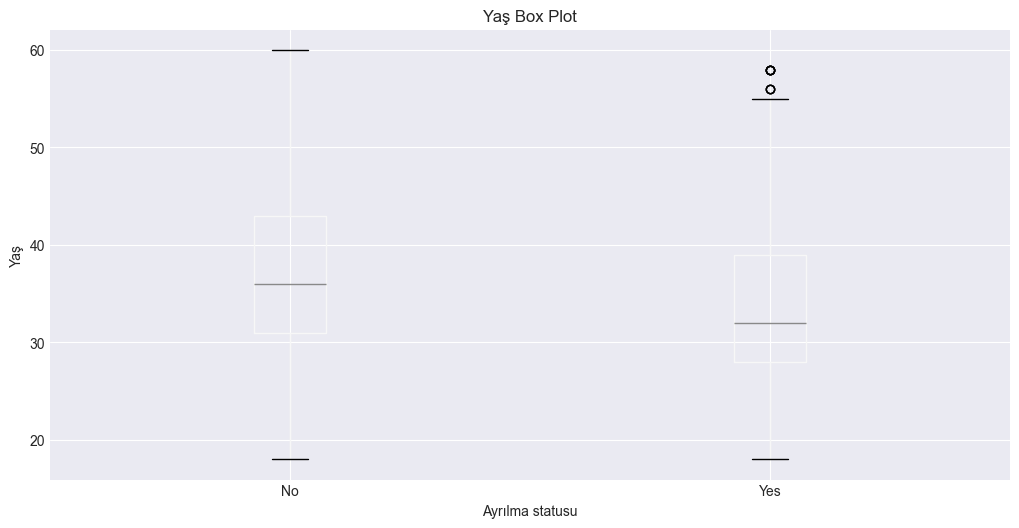

In [20]:
plt.figure(figsize=(9,6))
df.boxplot(column='Age', by='Attrition')
plt.xlabel('Ayrılma statusu')
plt.ylabel('Yaş')
plt.title('Yaş Box Plot')
plt.suptitle('')
plt.show()

In [21]:
print(f"Cins üzrə ayrılma: \n{pd.crosstab(df['Gender'], df['Attrition'], margins=True)}")
print(f"\n\nAyrılma faizləri: \n{pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100}")

Cins üzrə ayrılma: 
Attrition    No  Yes   All
Gender                    
Female      501   87   588
Male        732  150   882
All        1233  237  1470


Ayrılma faizləri: 
Attrition         No        Yes
Gender                         
Female     85.204082  14.795918
Male       82.993197  17.006803


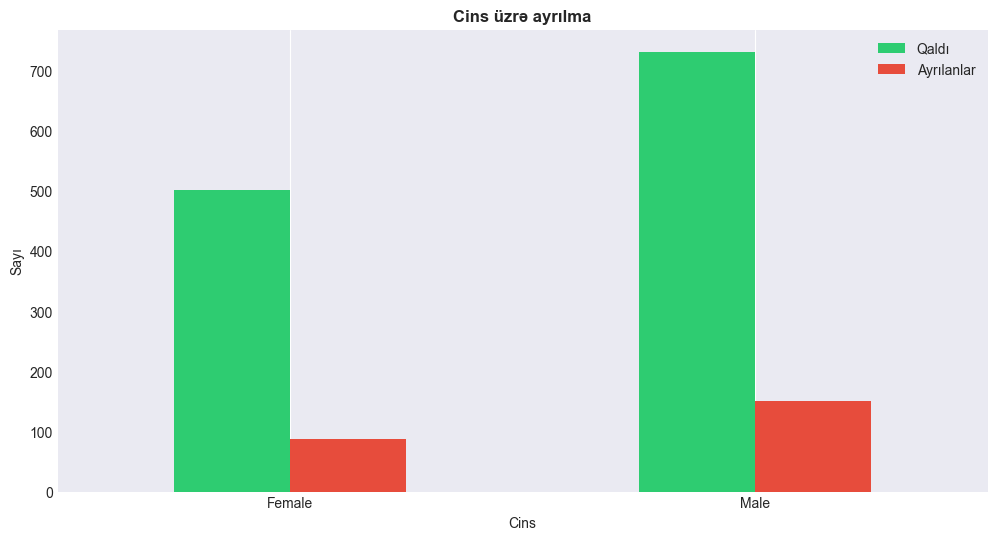

In [22]:
pd.crosstab(df['Gender'], df['Attrition']).plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Cins üzrə ayrılma', fontweight='bold')
plt.xlabel('Cins')
plt.ylabel('Sayı')
plt.xticks(rotation=0)
plt.legend(['Qaldı', 'Ayrılanlar'])
plt.grid(axis='y')
plt.show()

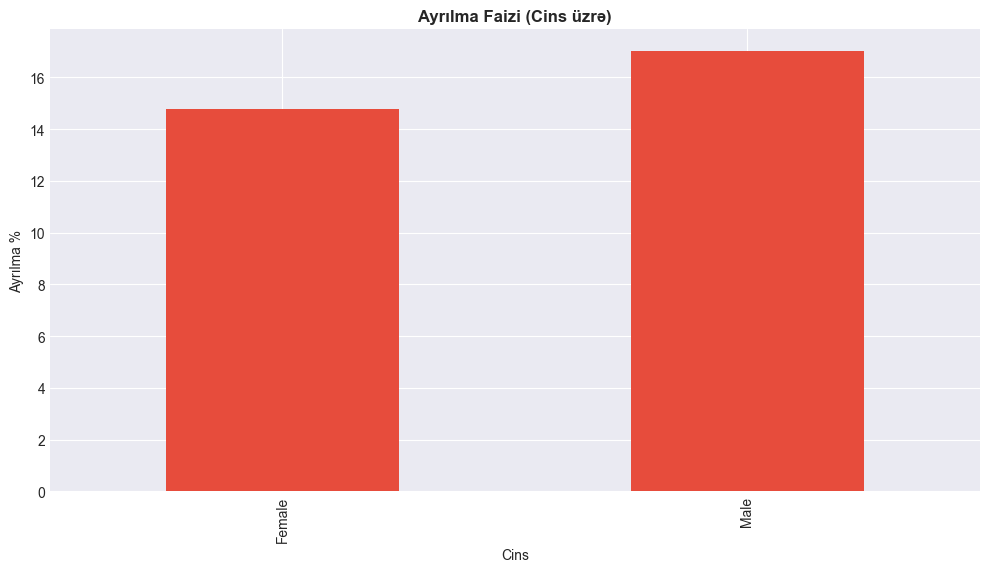

In [23]:
(pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100)[['Yes']].plot(kind='bar', color='#e74c3c', legend=False)
plt.title('Ayrılma Faizi (Cins üzrə)', fontweight='bold')
plt.xlabel('Cins')
plt.ylabel('Ayrılma %')
plt.show()

In [24]:
print(f"Nikah Statusu üzrə paylanma: \n{pd.crosstab(df['MaritalStatus'], df['Attrition'], margins=True)}")
print(f"\n\nAyrılma faizləri: \n{(pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100).round(1)}")

Nikah Statusu üzrə paylanma: 
Attrition        No  Yes   All
MaritalStatus                 
Divorced        294   33   327
Married         589   84   673
Single          350  120   470
All            1233  237  1470


Ayrılma faizləri: 
Attrition        No   Yes
MaritalStatus            
Divorced       89.9  10.1
Married        87.5  12.5
Single         74.5  25.5


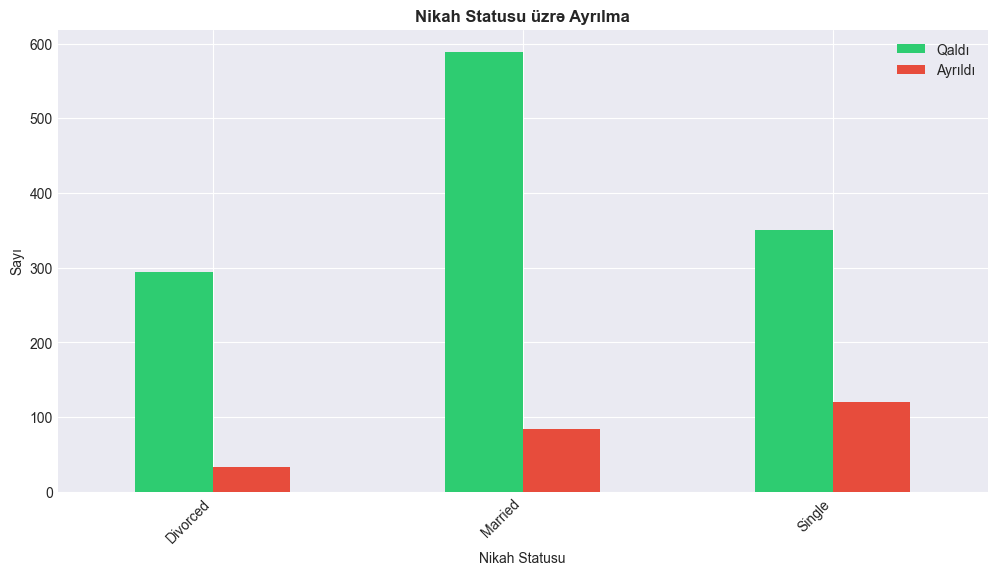

In [25]:
(pd.crosstab(df['MaritalStatus'], df['Attrition'])).plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Nikah Statusu üzrə Ayrılma', fontweight='bold')
plt.xlabel('Nikah Statusu')
plt.ylabel('Sayı')
plt.xticks(rotation = 45, ha='right')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.show()

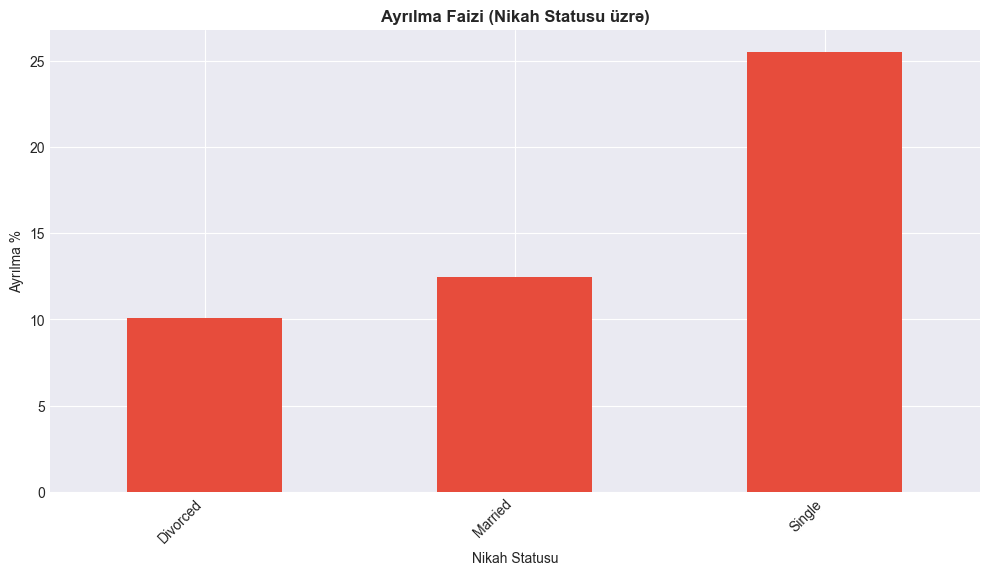

In [26]:
(pd.crosstab(df['MaritalStatus'], df['Attrition'], normalize='index') * 100)[['Yes']].plot(kind='bar', color='#e74c3c', legend=False)
plt.title('Ayrılma Faizi (Nikah Statusu üzrə)', fontweight='bold')
plt.xlabel('Nikah Statusu')
plt.ylabel('Ayrılma %')
plt.xticks(rotation=45, ha='right')
plt.show()

## Departament və Vəzifə Təhlili

In [27]:
print(f"Departament üzrə ayrılma: \n{pd.crosstab(df['Department'], df['Attrition'], margins=True)}")
print(f"\nAyrılma Faizləri: \n{(pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100).round(1)}")

Departament üzrə ayrılma: 
Attrition                 No  Yes   All
Department                             
Human Resources           51   12    63
Research & Development   828  133   961
Sales                    354   92   446
All                     1233  237  1470

Ayrılma Faizləri: 
Attrition                 No   Yes
Department                        
Human Resources         81.0  19.0
Research & Development  86.2  13.8
Sales                   79.4  20.6


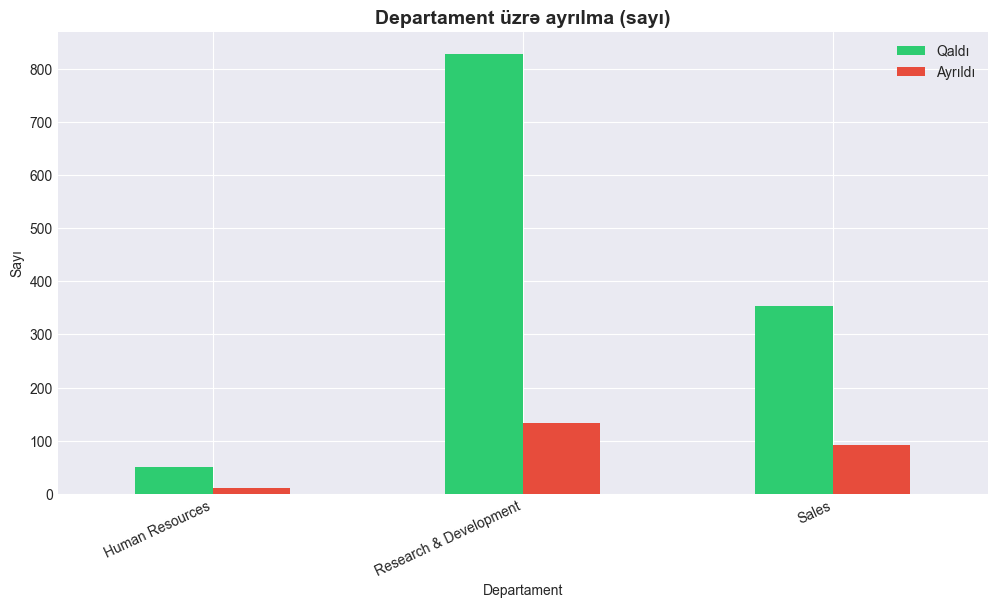

In [28]:
(pd.crosstab(df['Department'], df['Attrition'])).plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Departament üzrə ayrılma (sayı)', fontweight = 'bold', fontsize = 14)
plt.xlabel('Departament')
plt.ylabel('Sayı')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.xticks(rotation=25, ha='right')
plt.show()

In [29]:
dep_att = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100

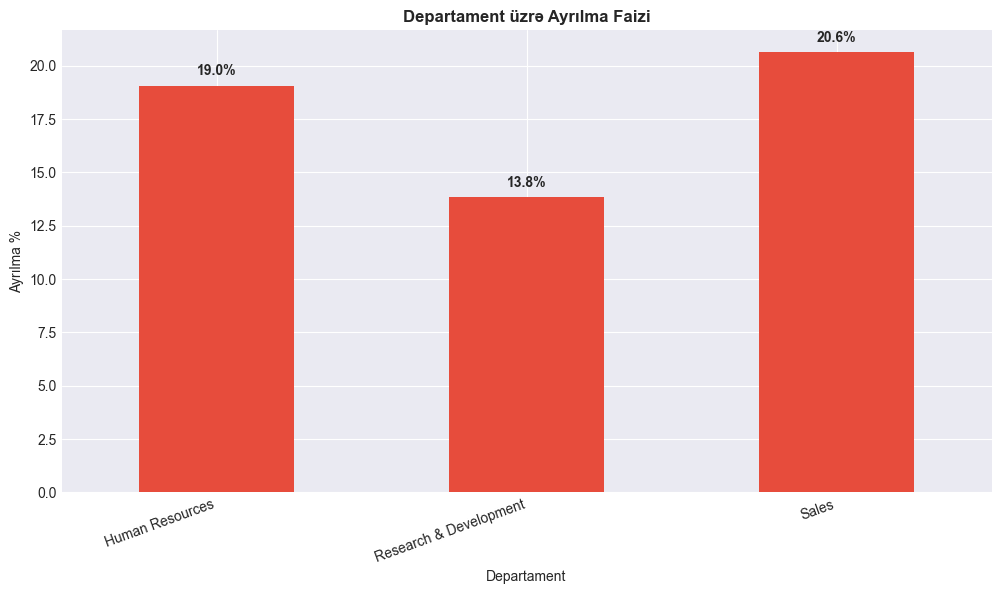

In [30]:
dep_att[['Yes']].plot(kind='bar', color='#e74c3c', legend=False)
plt.title('Departament üzrə Ayrılma Faizi', fontweight='bold', fontsize=12)
plt.xlabel('Departament')
plt.ylabel('Ayrılma %')
plt.xticks(rotation=20, ha='right')
for i, v in enumerate(dep_att['Yes'].values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')
plt.show()

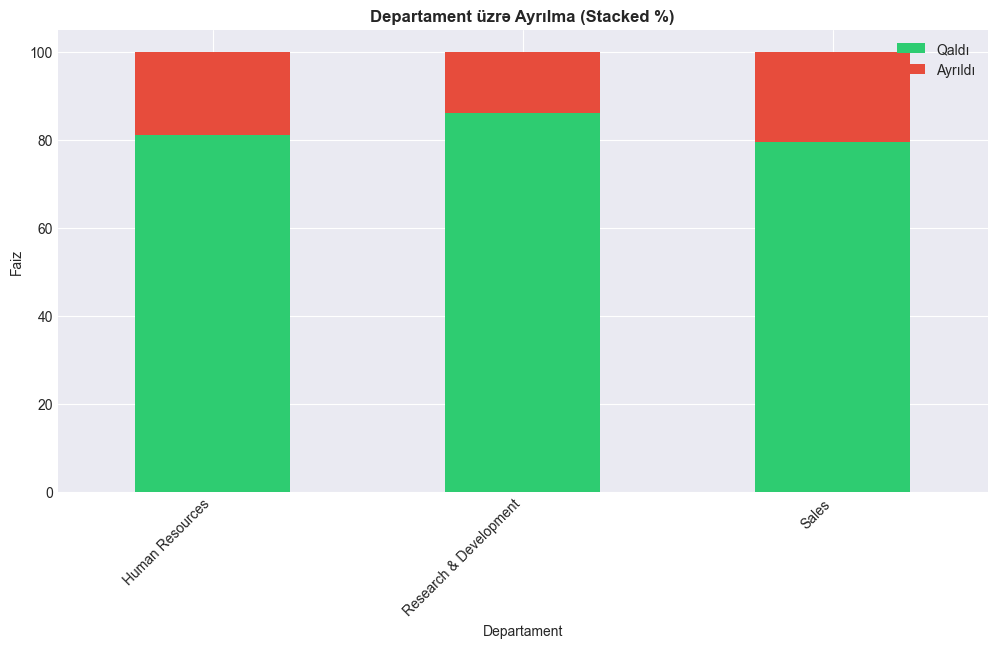

In [31]:
dep_att.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'])
plt.title('Departament üzrə Ayrılma (Stacked %)', fontweight='bold', fontsize=12)
plt.xlabel('Departament')
plt.ylabel('Faiz')
plt.xticks(rotation=45, ha='right')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.show()

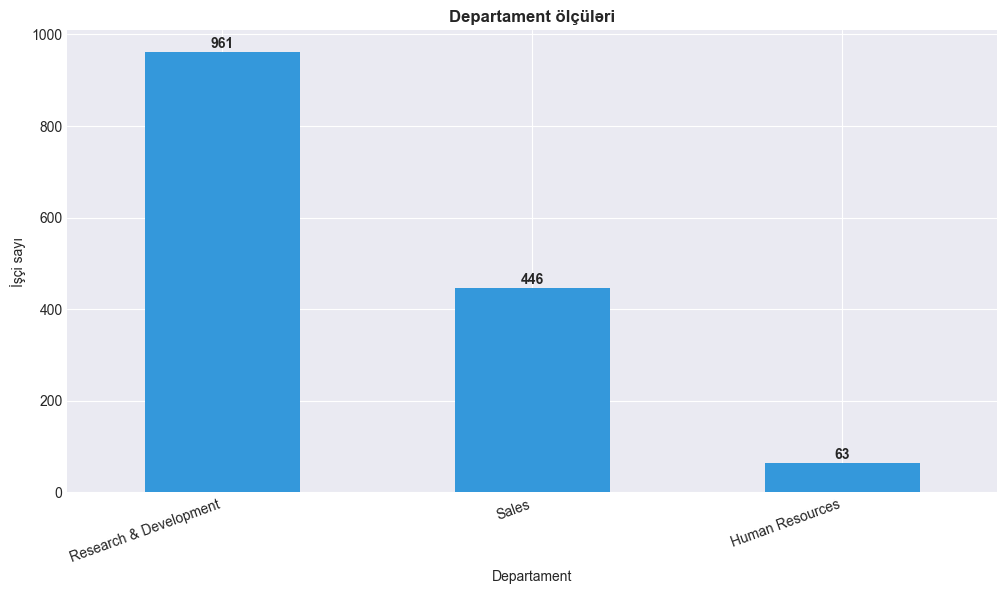

In [32]:
dept_size = df['Department'].value_counts()
dept_size.plot(kind='bar', color='#3498db')
plt.title('Departament ölçüləri', fontweight = 'bold', fontsize = 12)
plt.xlabel('Departament')
plt.ylabel('İşçi sayı')
plt.xticks(rotation = 20, ha='right')

for i, v in enumerate(dept_size.values):
    plt.text(i, v + 10 , str(v), ha='center', fontweight = 'bold')

plt.show()

In [33]:
role_attention = pd.crosstab(df['JobRole'], df['Attrition'])
role_attention_pct = pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100

role_analys = pd.DataFrame({
    'Ümumi': role_attention.sum(axis=1),
    'Ayrıldı': role_attention['Yes'],
    'Qaldı': role_attention['No'],
    'Ayrılma %': role_attention_pct['Yes']
}).sort_values('Ayrılma %', ascending=False)

print(f"\nVəzifə üzrə ayrılma analizi: \n\n{role_analys}")


Vəzifə üzrə ayrılma analizi: 

                           Ümumi  Ayrıldı  Qaldı  Ayrılma %
JobRole                                                    
Sales Representative          83       33     50  39.759036
Laboratory Technician        259       62    197  23.938224
Human Resources               52       12     40  23.076923
Sales Executive              326       57    269  17.484663
Research Scientist           292       47    245  16.095890
Manufacturing Director       145       10    135   6.896552
Healthcare Representative    131        9    122   6.870229
Manager                      102        5     97   4.901961
Research Director             80        2     78   2.500000


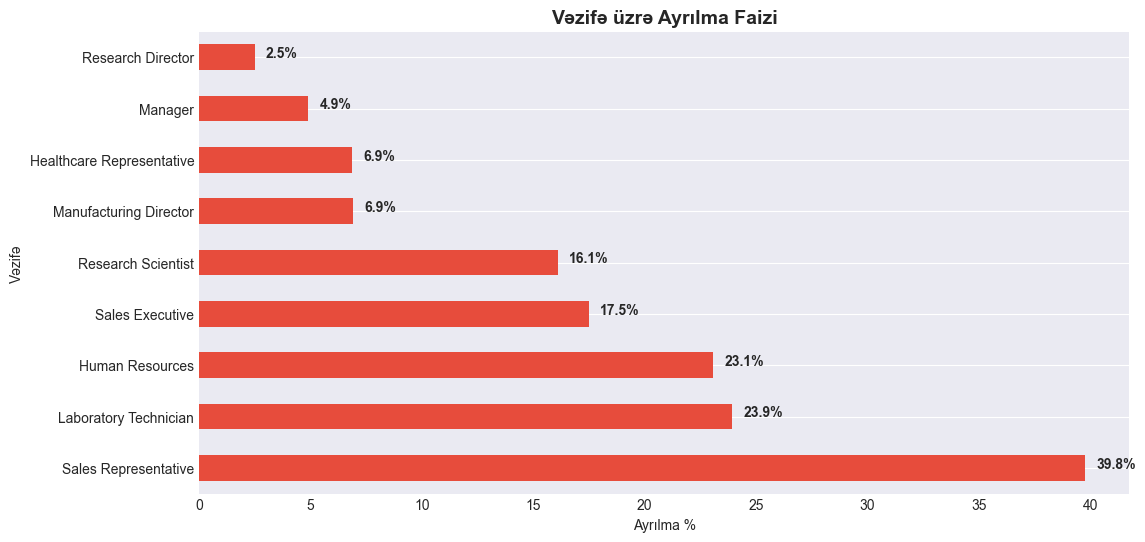

In [34]:
role_analys['Ayrılma %'].plot(kind='barh', color = '#e74c3c')
plt.title('Vəzifə üzrə Ayrılma Faizi', fontweight='bold', fontsize=14)
plt.xlabel('Ayrılma %')
plt.ylabel('Vəzifə')
plt.grid(axis='x')

for i, v in enumerate(role_analys['Ayrılma %'].values):
    plt.text(v + 0.5, i, f'{v:.1f}%', fontweight='bold')

plt.show()

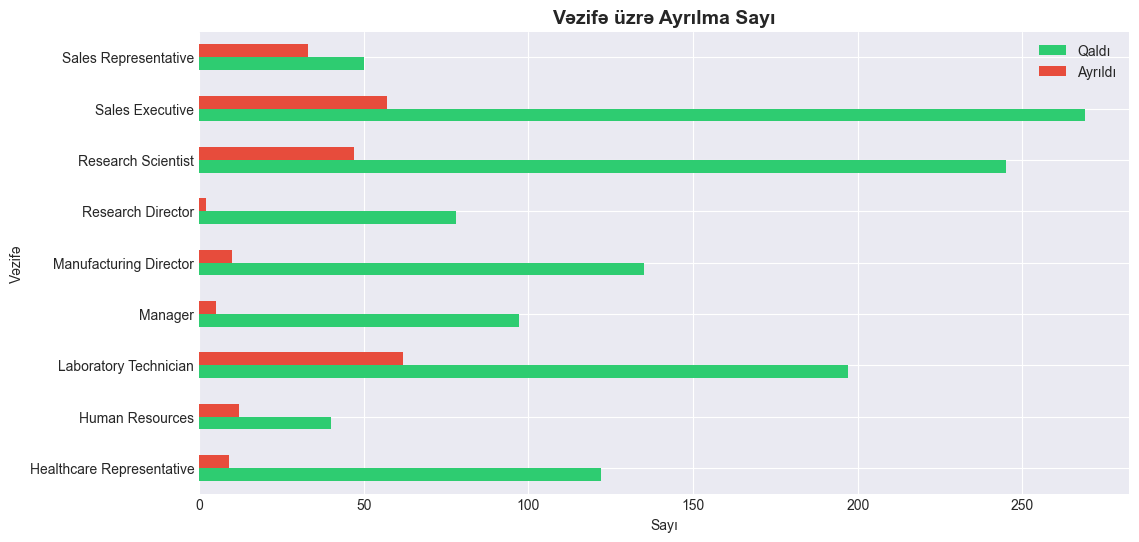

In [35]:
role_attention.plot(kind='barh', color=['#2ecc71', '#e74c3c'], stacked=False)
plt.title('Vəzifə üzrə Ayrılma Sayı', fontweight='bold', fontsize=14)
plt.xlabel('Sayı')
plt.ylabel('Vəzifə')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.show()

## Əmək Haqqı və Kompensasiya Analizi

In [36]:
print(f"Orta aylıq əmək haqqı:  ${df['MonthlyIncome'].mean():.0f}")
print(f"\nMedian əmək haqqı: ${df['MonthlyIncome'].median():.0f}")
print(f"\nMinimum: ${df['MonthlyIncome'].min():.0f}")
print(f"\nMaximum: ${df['MonthlyIncome'].max():.0f}")
print(f"\nStandart Sapma: ${df['MonthlyIncome'].std():.0f}")

Orta aylıq əmək haqqı:  $6503

Median əmək haqqı: $4919

Minimum: $1009

Maximum: $19999

Standart Sapma: $4708


In [37]:
ayrilan_maas = df[df['Attrition']=='Yes']['MonthlyIncome']
qalan_maas = df[df['Attrition']=='No']['MonthlyIncome']

print(f"Ayrılanların orta əmək haqqı: ${ayrilan_maas.mean():.0f}")
print(f"\nQalanların orta əmək haqqı: ${qalan_maas.mean():.0f}")
print(f"\nFərq: ${abs(ayrilan_maas.mean() - qalan_maas.mean()):.0f}")
print(f"\nFərq (faiz): {abs(ayrilan_maas.mean() - qalan_maas.mean()) / qalan_maas.mean() * 100:.1f}%")

Ayrılanların orta əmək haqqı: $4787

Qalanların orta əmək haqqı: $6833

Fərq: $2046

Fərq (faiz): 29.9%


In [38]:
t_stat, p_value = stats.ttest_ind(ayrilan_maas, qalan_maas)
print(f"t-statistika: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Fərq statistik olaraq əhəmiyyətlidir (p < 0.05)")
else:
    print("Fərq statistik olaraq əhəmiyyətli deyil (p >= 0.05)")

t-statistika: -6.204
p-value: 0.0000
Fərq statistik olaraq əhəmiyyətlidir (p < 0.05)


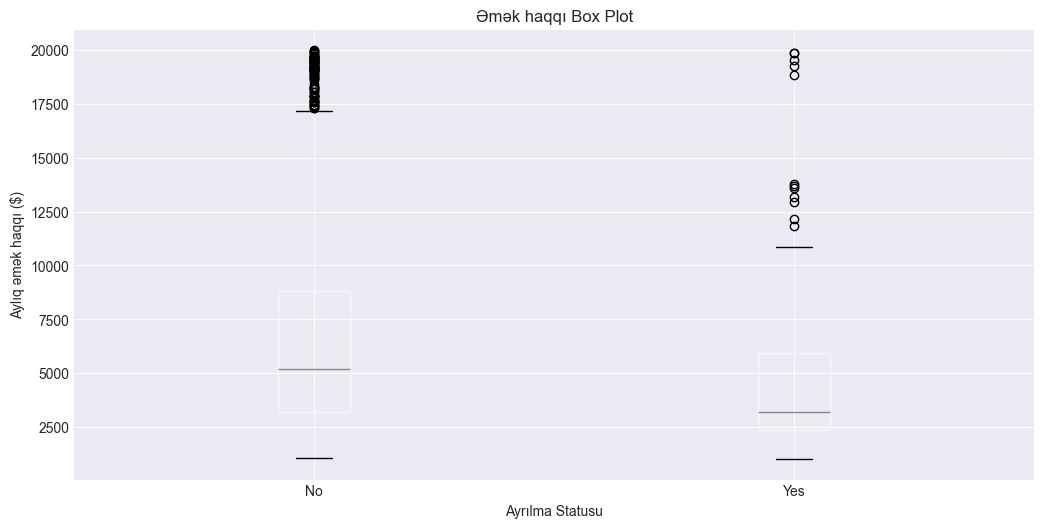

In [39]:
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.title('Əmək haqqı Box Plot')
plt.xlabel('Ayrılma Statusu')
plt.ylabel('Aylıq əmək haqqı ($)')
plt.suptitle('')
plt.show()

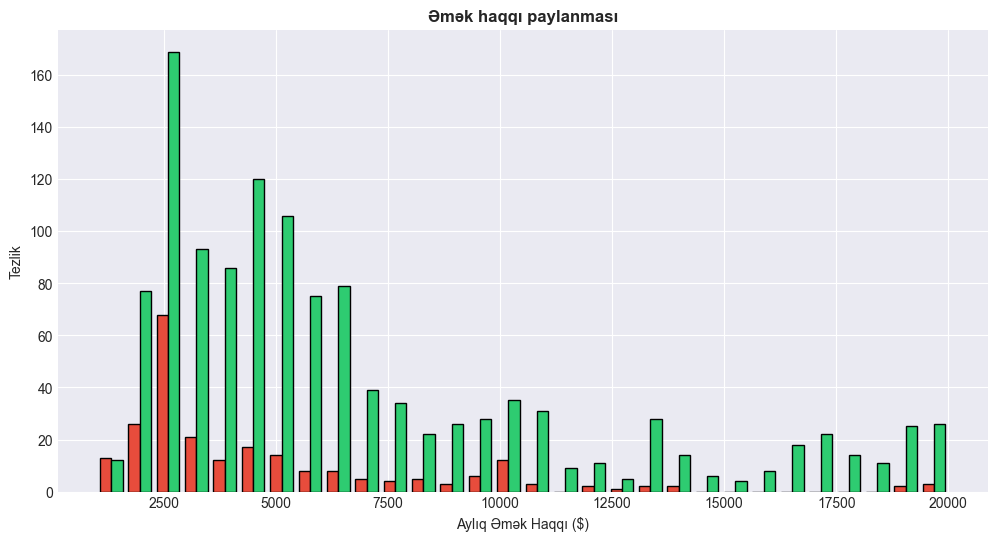

In [40]:
plt.hist([ayrilan_maas, qalan_maas], bins=30, label=['Ayrıldı', 'Qaldı'], color=['#e74c3c', '#2ecc71'], edgecolor='black')
plt.title('Əmək haqqı paylanması', fontweight ='bold')
plt.xlabel('Aylıq Əmək Haqqı ($)')
plt.ylabel('Tezlik')
plt.grid('y')
plt.show()

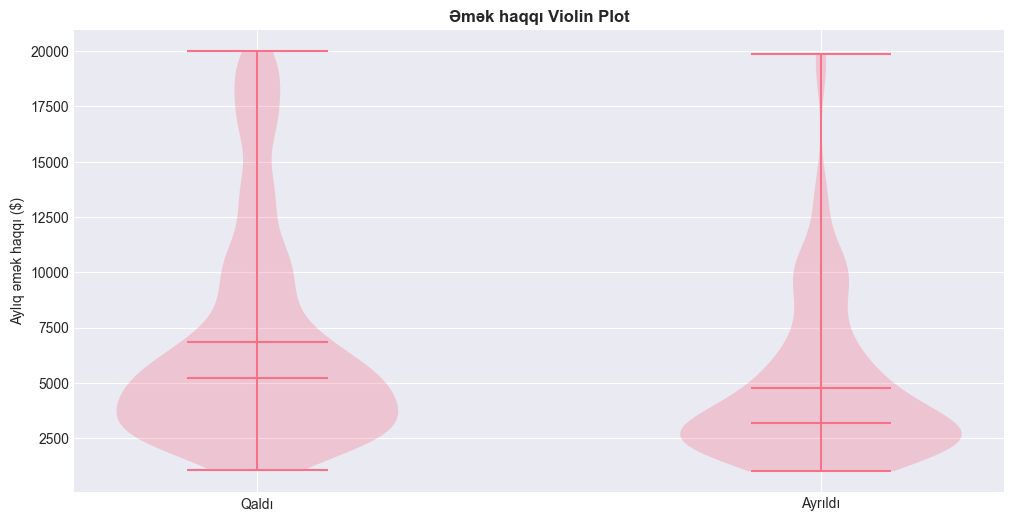

In [41]:
plt.violinplot([qalan_maas, ayrilan_maas], showmeans=True, showmedians=True, positions=[0, 1])
plt.title('Əmək haqqı Violin Plot', fontweight='bold')
plt.ylabel('Aylıq əmək haqqı ($)')
plt.xticks([0, 1] , ['Qaldı', 'Ayrıldı'])
plt.show()

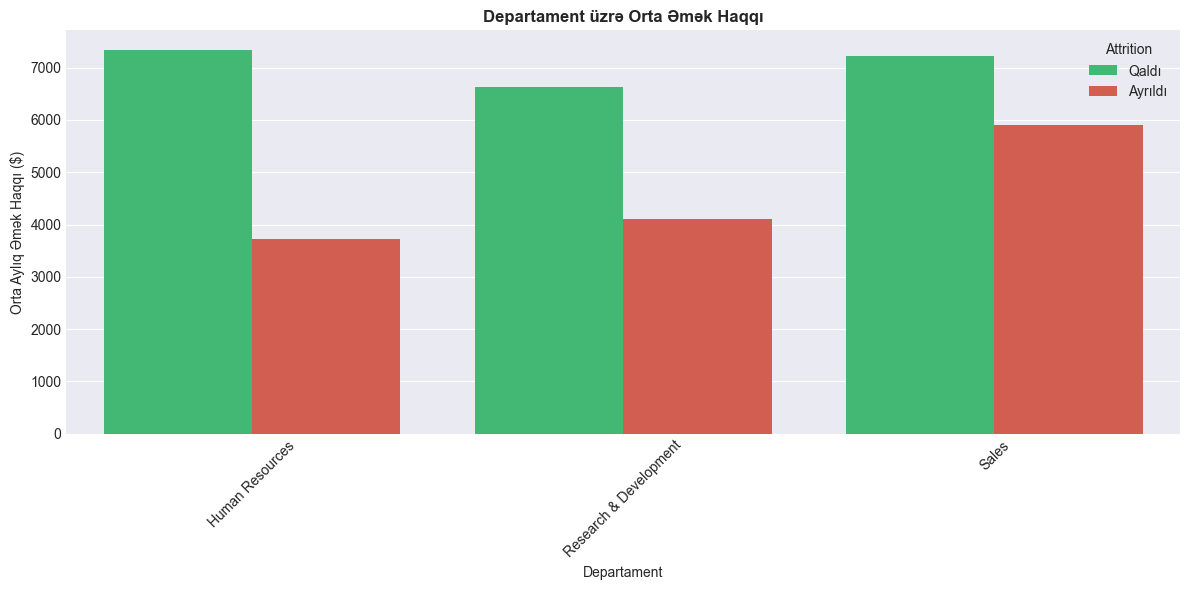

In [42]:
dept_salary = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().reset_index()
dept_salary['Attrition'] = dept_salary['Attrition'].map({'No': 'Qaldı', 'Yes': 'Ayrıldı'})


plt.figure()
sns.barplot(data=dept_salary, x='Department', y='MonthlyIncome', hue='Attrition', palette=['#2ecc71', '#e74c3c'])
plt.xticks(rotation=45)
plt.title('Departament üzrə Orta Əmək Haqqı', fontweight='bold')
plt.xlabel(('Departament'))
plt.ylabel('Orta Aylıq Əmək Haqqı ($)')
plt.tight_layout()
plt.show()

In [43]:
level_salary = df.groupby('JobLevel')['MonthlyIncome'].agg(['mean', 'median', 'count'])
level_salary

,mean,median,count
JobLevel,,,
1,2786.915285,2670.0,543
2,5502.277154,5340.0,534
3,9817.252294,9980.0,218
4,15503.783019,16154.0,106
5,19191.826087,19232.0,69


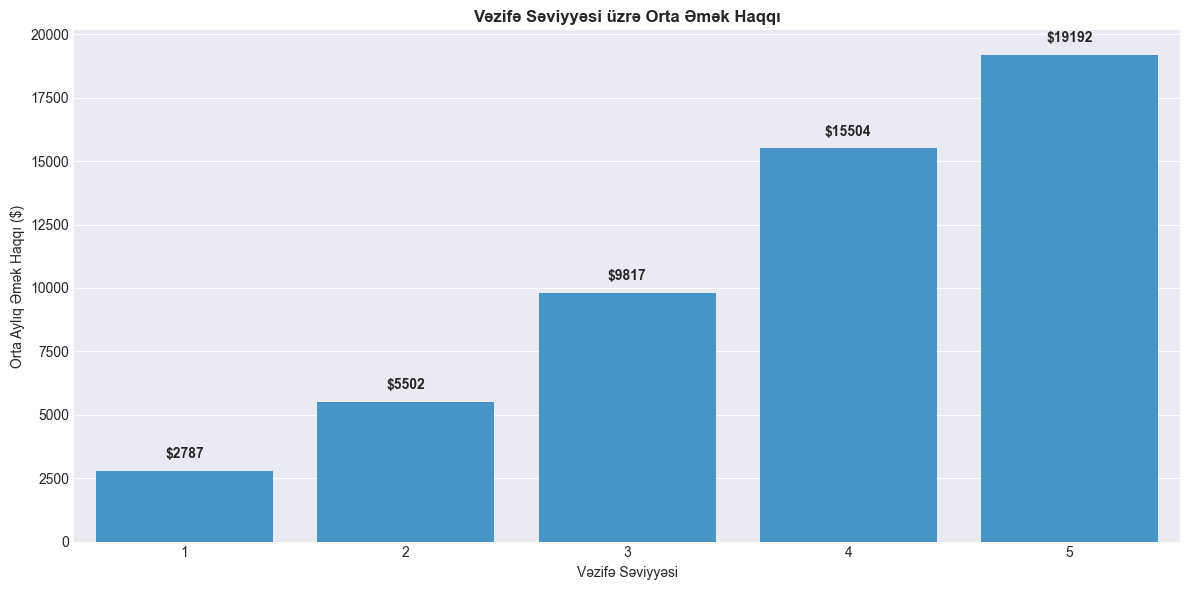

In [44]:
plt.figure()
sns.barplot(data = level_salary, x='JobLevel', y=level_salary['mean'], color='#3498db')
plt.title('Vəzifə Səviyyəsi üzrə Orta Əmək Haqqı', fontweight='bold')
plt.xlabel('Vəzifə Səviyyəsi')
plt.ylabel('Orta Aylıq Əmək Haqqı ($)')

for i,v in enumerate(level_salary['mean'].values):
    plt.text(i, v + 500, f'${v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



## İş Şərtləri və Mühit Analizi

In [45]:
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'])
overtime_attrition_pct = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100

print(overtime_attrition)
print("\n", overtime_attrition_pct)

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127

 Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [46]:
overtime_yes_rate = overtime_attrition_pct.loc['Yes', 'Yes']
overtime_no_rate = overtime_attrition_pct.loc['No', 'Yes']
risk_increase = overtime_yes_rate / overtime_no_rate

print(f"Overtime edənlərdə ayrılma: {overtime_yes_rate:.1f}%")
print(f"Overtime etməyənlərdə ayrılma: {overtime_no_rate:.1f}%")
print(f"Risk artımı: {risk_increase:.1f}x daha yüksək")


Overtime edənlərdə ayrılma: 30.5%
Overtime etməyənlərdə ayrılma: 10.4%
Risk artımı: 2.9x daha yüksək


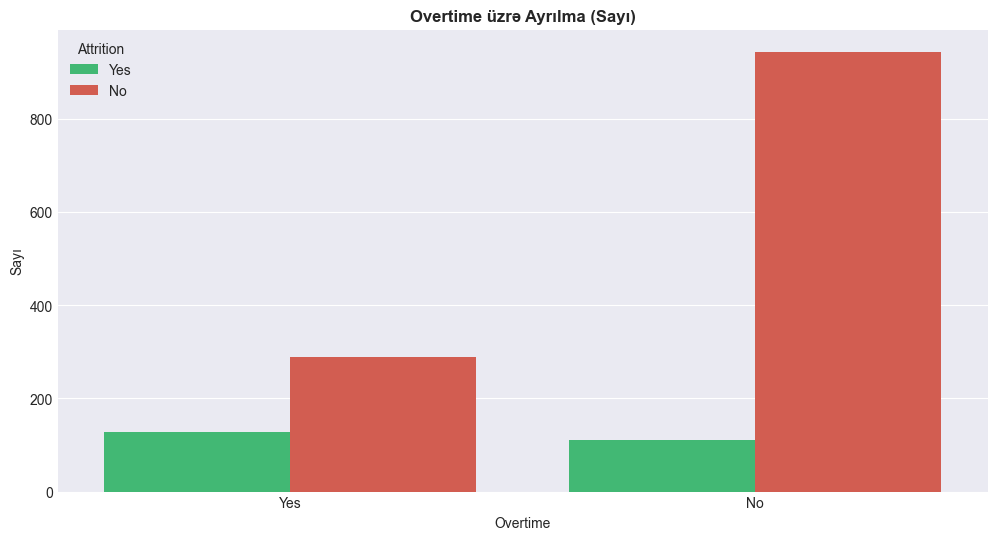

In [47]:
plt.figure()
sns.countplot(data = df, x='OverTime', hue='Attrition', palette=['#2ecc71', '#e74c3c'])
plt.title('Overtime üzrə Ayrılma (Sayı)', fontweight='bold', fontsize=12)
plt.xlabel('Overtime')
plt.ylabel('Sayı')
plt.show()

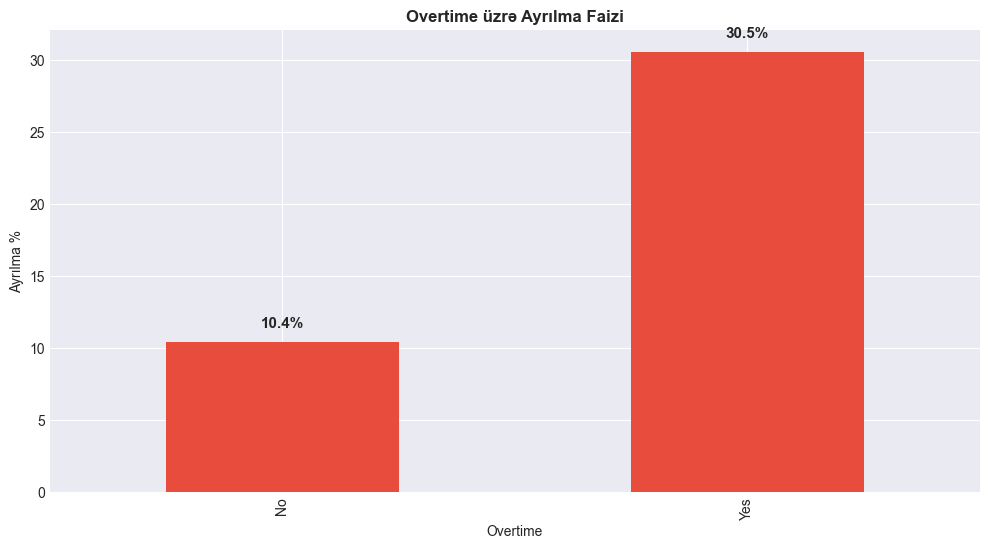

In [48]:
overtime_attrition_pct['Yes'].plot(kind='bar', color='#e74c3c')
plt.title('Overtime üzrə Ayrılma Faizi', fontweight='bold', fontsize=12)
plt.xlabel('Overtime')
plt.ylabel('Ayrılma %')
for i, v in enumerate(overtime_attrition_pct['Yes'].values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.show()

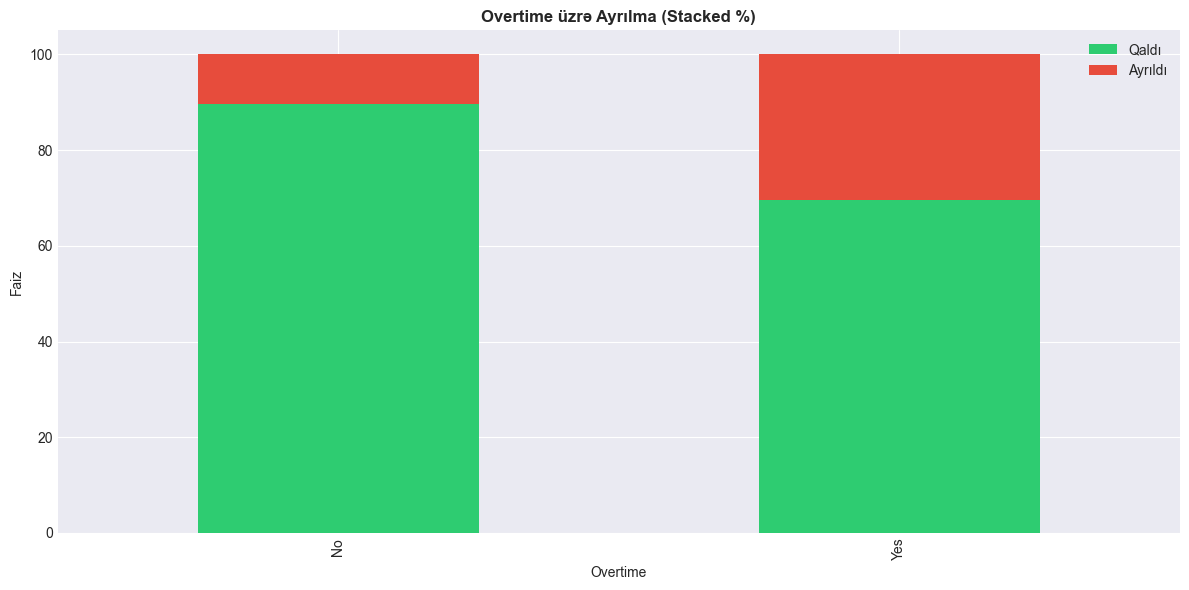

In [49]:
overtime_attrition_pct.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'])
plt.title('Overtime üzrə Ayrılma (Stacked %)', fontweight='bold', fontsize=12)
plt.xlabel('Overtime')
plt.ylabel('Faiz')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.tight_layout()
plt.show()

In [50]:
satisfaction_vars = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

for var in satisfaction_vars:
    overall_mean = df[var].mean()
    left_mean = df[df['Attrition']=='Yes'][var].mean()
    stayed_mean = df[df['Attrition']=='No'][var].mean()

    print(f"\n{var}:")
    print(f"  Ümumi: {overall_mean:.2f}")
    print(f"  Ayrıldı: {left_mean:.2f}")
    print(f"  Qaldı: {stayed_mean:.2f}")
    print(f"  Fərq: {abs(left_mean - stayed_mean):.2f}")


JobSatisfaction:
  Ümumi: 2.73
  Ayrıldı: 2.47
  Qaldı: 2.78
  Fərq: 0.31

EnvironmentSatisfaction:
  Ümumi: 2.72
  Ayrıldı: 2.46
  Qaldı: 2.77
  Fərq: 0.31

RelationshipSatisfaction:
  Ümumi: 2.71
  Ayrıldı: 2.60
  Qaldı: 2.73
  Fərq: 0.13

WorkLifeBalance:
  Ümumi: 2.76
  Ayrıldı: 2.66
  Qaldı: 2.78
  Fərq: 0.12


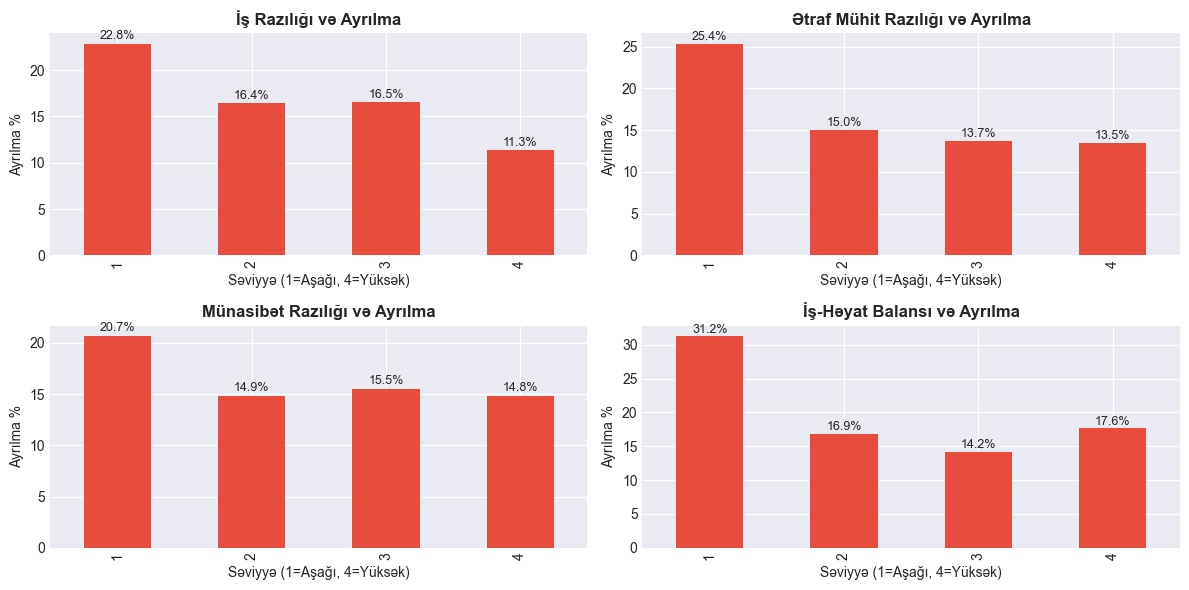

In [51]:
fig, axes = plt.subplots(2, 2)
axes = axes.ravel()

titles = ['İş Razılığı', 'Ətraf Mühit Razılığı', 'Münasibət Razılığı', 'İş-Həyat Balansı']

for idx, (var, title) in enumerate(zip(satisfaction_vars, titles)):
    sat_attrition_pct = pd.crosstab(df[var], df['Attrition'], normalize='index') * 100
    sat_attrition_pct['Yes'].plot(kind='bar', ax=axes[idx], color='#e74c3c')
    axes[idx].set_title(f'{title} və Ayrılma', fontweight='bold', fontsize=12)
    axes[idx].set_xlabel('Səviyyə (1=Aşağı, 4=Yüksək)')
    axes[idx].set_ylabel('Ayrılma %')
    for i, v in enumerate(sat_attrition_pct['Yes'].values):
        axes[idx].text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [52]:
print(f"Orta məsafə: {df['DistanceFromHome'].mean():.1f} mil")
print(f"Median məsafə: {df['DistanceFromHome'].mean():.1f} mil")
print(f"Maksimum məsafəI {df['DistanceFromHome'].mean():.1f} mil")

Orta məsafə: 9.2 mil
Median məsafə: 9.2 mil
Maksimum məsafəI 9.2 mil


In [53]:
distance_left = df[df['Attrition']=='Yes']['DistanceFromHome'].mean()
distance_stayed = df[df['Attrition']=='No']['DistanceFromHome'].mean()

print(f"Ayrılanların orta məsafəsi: {distance_left:.1f} mil")
print(f"Qalanların orta məsafəsi: {distance_stayed:.1f} mil")
print(f"Fərq: {abs(distance_left - distance_stayed):.1f} mil")

Ayrılanların orta məsafəsi: 10.6 mil
Qalanların orta məsafəsi: 8.9 mil
Fərq: 1.7 mil


In [54]:
travel_attrition = pd.crosstab(df['BusinessTravel'], df['Attrition'])
travel_attrition_pct = pd.crosstab(df['BusinessTravel'], df['Attrition'], normalize='index') * 100
print(travel_attrition_pct.round(1))

Attrition            No   Yes
BusinessTravel               
Non-Travel         92.0   8.0
Travel_Frequently  75.1  24.9
Travel_Rarely      85.0  15.0


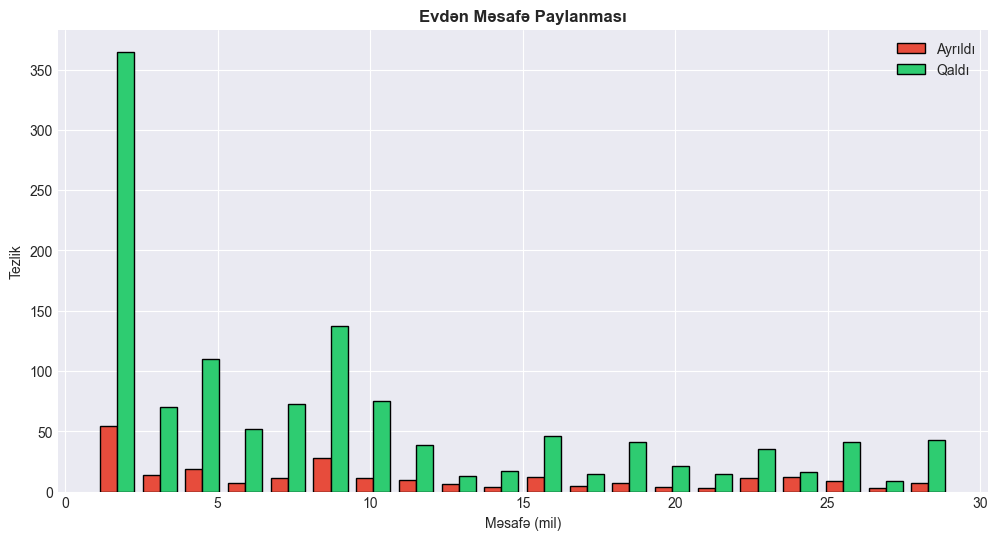

In [55]:
plt.hist([(df[df['Attrition']=='Yes']['DistanceFromHome']), (df[df['Attrition']=='No']['DistanceFromHome'])],  label=['Ayrıldı', 'Qaldı'], color=['#e74c3c', '#2ecc71'], bins=20, edgecolor='black')
plt.title('Evdən Məsafə Paylanması', fontweight='bold')
plt.xlabel('Məsafə (mil)')
plt.ylabel('Tezlik')
plt.legend()
plt.show()

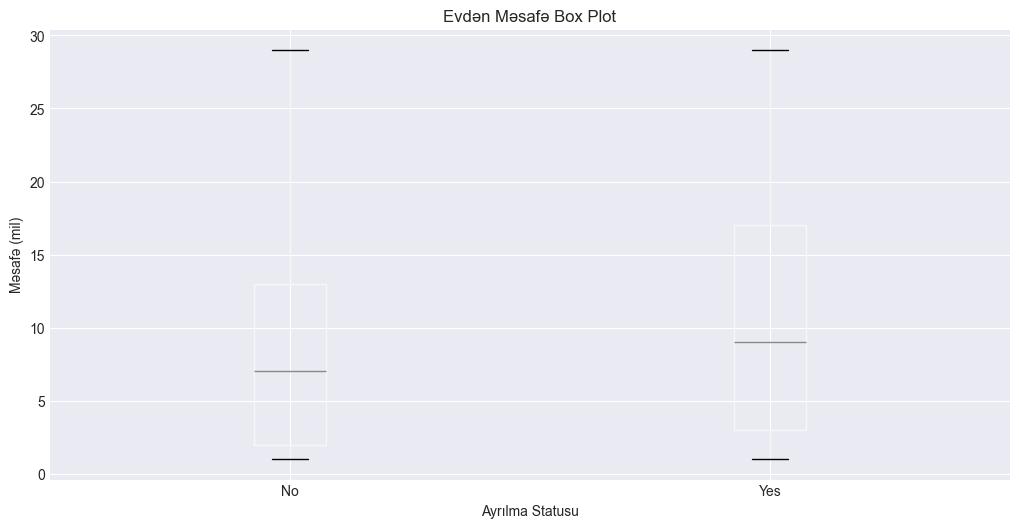

In [56]:
df.boxplot(column='DistanceFromHome', by='Attrition')
plt.title('Evdən Məsafə Box Plot')
plt.xlabel('Ayrılma Statusu')
plt.ylabel('Məsafə (mil)')
plt.suptitle('')
plt.show()

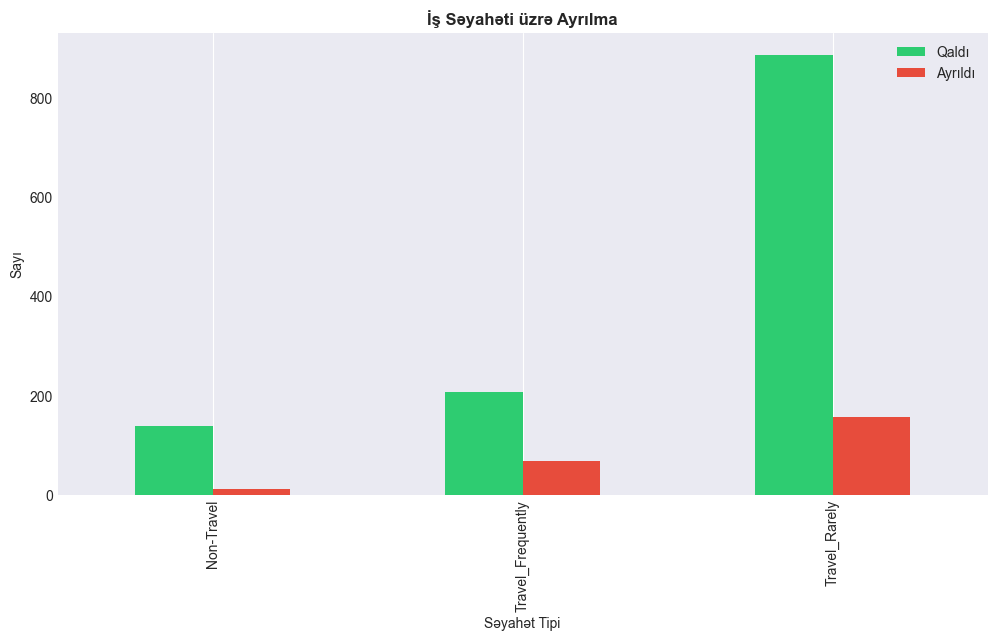

In [57]:
travel_attrition.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('İş Səyahəti üzrə Ayrılma', fontweight='bold')
plt.xlabel('Səyahət Tipi')
plt.ylabel('Sayı')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.grid(axis='y')
plt.show()

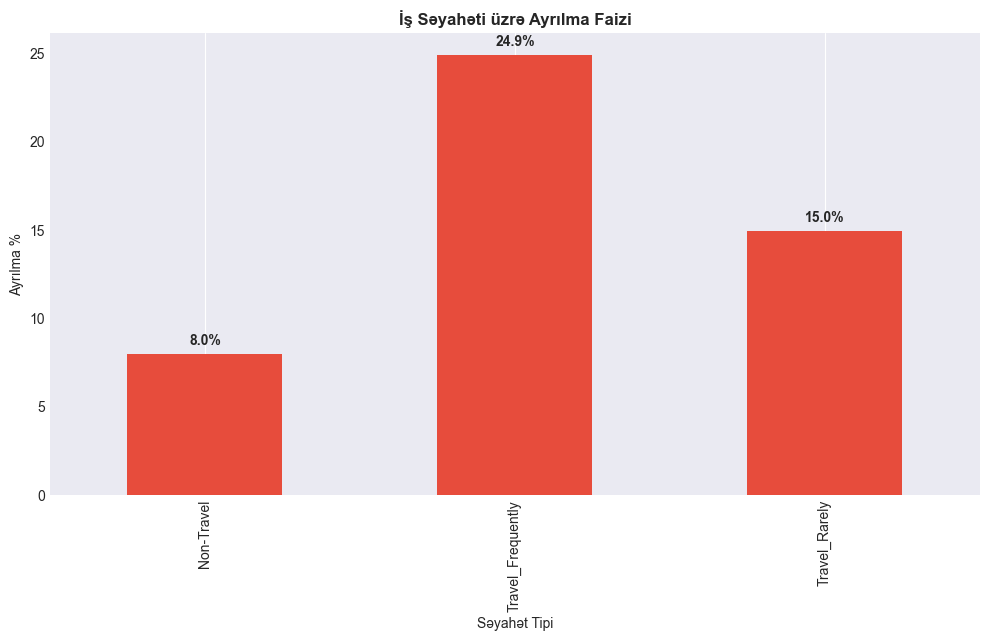

In [58]:
travel_attrition_pct['Yes'].plot(kind='bar', color='#e74c3c')
plt.title('İş Səyahəti üzrə Ayrılma Faizi', fontweight='bold')
plt.xlabel('Səyahət Tipi')
plt.ylabel('Ayrılma %')
plt.grid(axis='y')

for i, v in enumerate(travel_attrition_pct['Yes'].values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

## Təcrübə və Karyera İnkişafı

In [59]:
experience_vars = ['TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']
var_names = ['Ümumi iş təcrübəsi', 'Şirkətdə işləmə', 'Cari vəzifədə işləmə', 'Son təqibdən bəri']

for var, name in zip(experience_vars, var_names):
    overall_mean = df[var].mean()
    left_mean = df[df['Attrition']=='Yes'][var].mean()
    stayed_mean = df[df['Attrition']=='No'][var].mean()
    
    print(f"\n{name}:")
    print(f"Ümumi orta: {overall_mean:.1f} il")
    print(f"Ayrıldı: {left_mean:.1f} il")
    print(f"Qaldı: {stayed_mean:.1f} il")
    print(f"Fərq: {abs(left_mean - stayed_mean):.1f} il")



Ümumi iş təcrübəsi:
Ümumi orta: 11.3 il
Ayrıldı: 8.2 il
Qaldı: 11.9 il
Fərq: 3.6 il

Şirkətdə işləmə:
Ümumi orta: 7.0 il
Ayrıldı: 5.1 il
Qaldı: 7.4 il
Fərq: 2.2 il

Cari vəzifədə işləmə:
Ümumi orta: 4.2 il
Ayrıldı: 2.9 il
Qaldı: 4.5 il
Fərq: 1.6 il

Son təqibdən bəri:
Ümumi orta: 2.2 il
Ayrıldı: 1.9 il
Qaldı: 2.2 il
Fərq: 0.3 il


In [60]:
df['YearsAtCompany_Group'] = pd.cut(df['YearsAtCompany'], bins=[0, 2, 5, 10, 20, 50], labels=['0-2 il', '2-5 il', '5-10 il', '10-20 il', '20+ il'])

years_attrition = pd.crosstab(df['YearsAtCompany_Group'], df['Attrition'])
years_attrition_pct = pd.crosstab(df['YearsAtCompany_Group'], df['Attrition'], normalize='index') * 100

print("İşləmə müddəti üzrə ayrılma:")
print(years_attrition)
print("\nAyrılma faizləri:")
print(years_attrition_pct.round(1))


İşləmə müddəti üzrə ayrılma:
Attrition              No  Yes
YearsAtCompany_Group          
0-2 il                212   86
2-5 il                374   60
5-10 il               393   55
10-20 il              168   12
20+ il                 58    8

Ayrılma faizləri:
Attrition               No   Yes
YearsAtCompany_Group            
0-2 il                71.1  28.9
2-5 il                86.2  13.8
5-10 il               87.7  12.3
10-20 il              93.3   6.7
20+ il                87.9  12.1


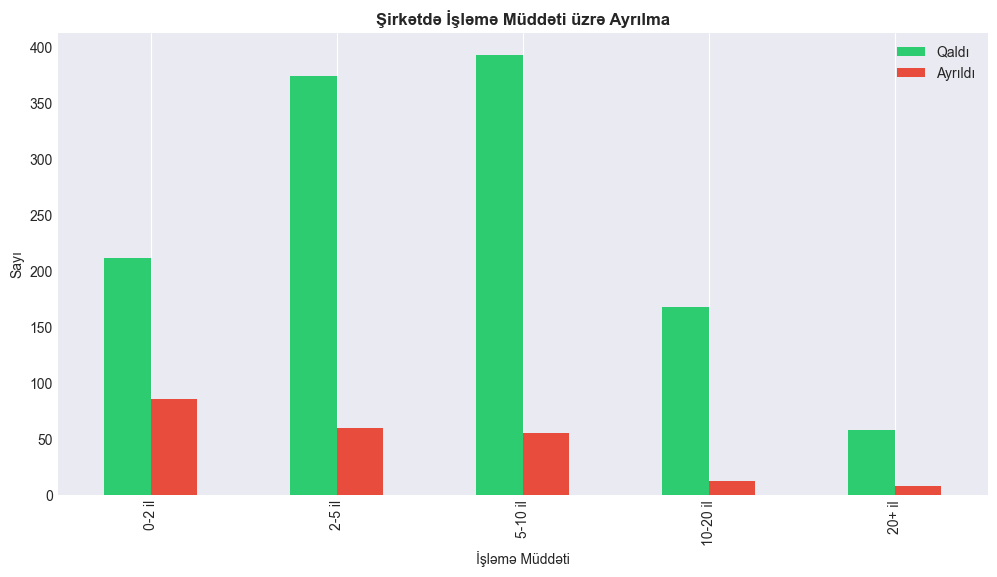

In [61]:
years_attrition.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Şirkətdə İşləmə Müddəti üzrə Ayrılma', fontweight='bold')
plt.xlabel('İşləmə Müddəti')
plt.ylabel('Sayı')
plt.legend(['Qaldı', 'Ayrıldı'])
plt.grid(axis='y')
plt.show()

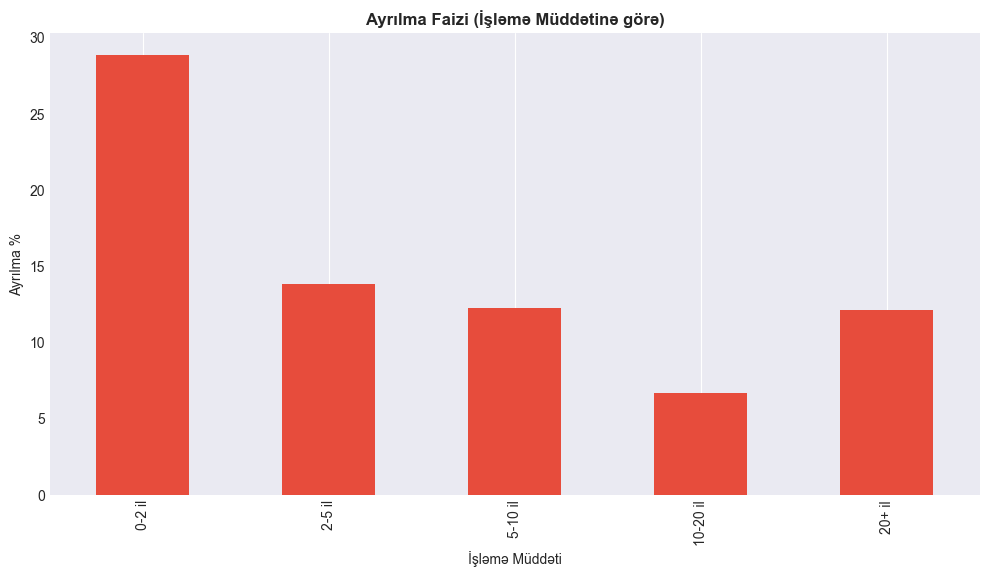

In [62]:
years_attrition_pct['Yes'].plot(kind='bar', color='#e74c3c')
plt.title('Ayrılma Faizi (İşləmə Müddətinə görə)', fontweight='bold')
plt.xlabel('İşləmə Müddəti')
plt.ylabel('Ayrılma %')
plt.grid(axis='y')
for i, v in enumerate(years_attrition_pct['Yes'].values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.show()

## Korrelyasiya və Əlaqə Analizi

In [64]:
df['Attrition_Numeric'] = (df['Attrition'] == 'Yes').astype(int)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()
attrition_corr = correlation_matrix['Attrition_Numeric'].sort_values(ascending=False)


In [67]:
print("Ayrılma ilə ən güclü müsbət əlaqəli amillər:")
print(attrition_corr) 

Ayrılma ilə ən güclü müsbət əlaqəli amillər:
Attrition_Numeric           1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                 

In [ ]:
print("\nAyrılma ilə ən güclü mənfi əlaqəli amillər:")
print(attrition_corr[::-1])


Ayrılma ilə ən güclü mənfi əlaqəli amillər:
StandardHours                    NaN
EmployeeCount                    NaN
TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
DistanceFromHome            0.

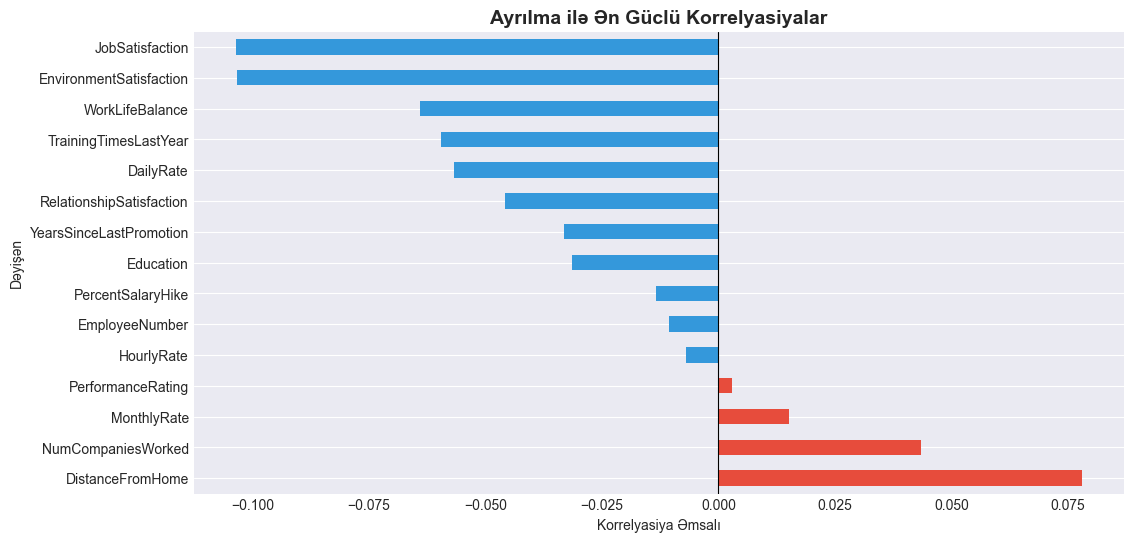

In [77]:
top_corr = attrition_corr[1:16]
colors_corr = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr.values]
top_corr.plot(kind='barh', color=colors_corr)
plt.title('Ayrılma ilə Ən Güclü Korrelyasiyalar', fontweight='bold', fontsize=14)
plt.xlabel('Korrelyasiya Əmsalı')
plt.ylabel('Dəyişən')
plt.grid(axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.show()

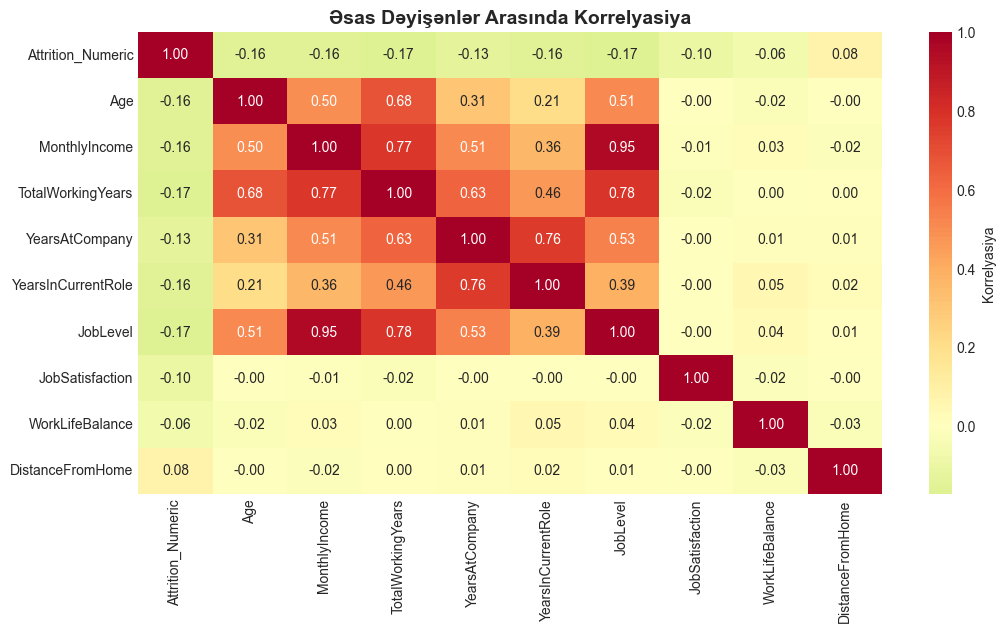

In [80]:
selected_vars = ['Attrition_Numeric', 'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance', 'DistanceFromHome']
selected_corr = df[selected_vars].corr()

sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0, cbar_kws={'label': 'Korrelyasiya'})
plt.title('Əsas Dəyişənlər Arasında Korrelyasiya', fontweight='bold', fontsize=14)
plt.show()

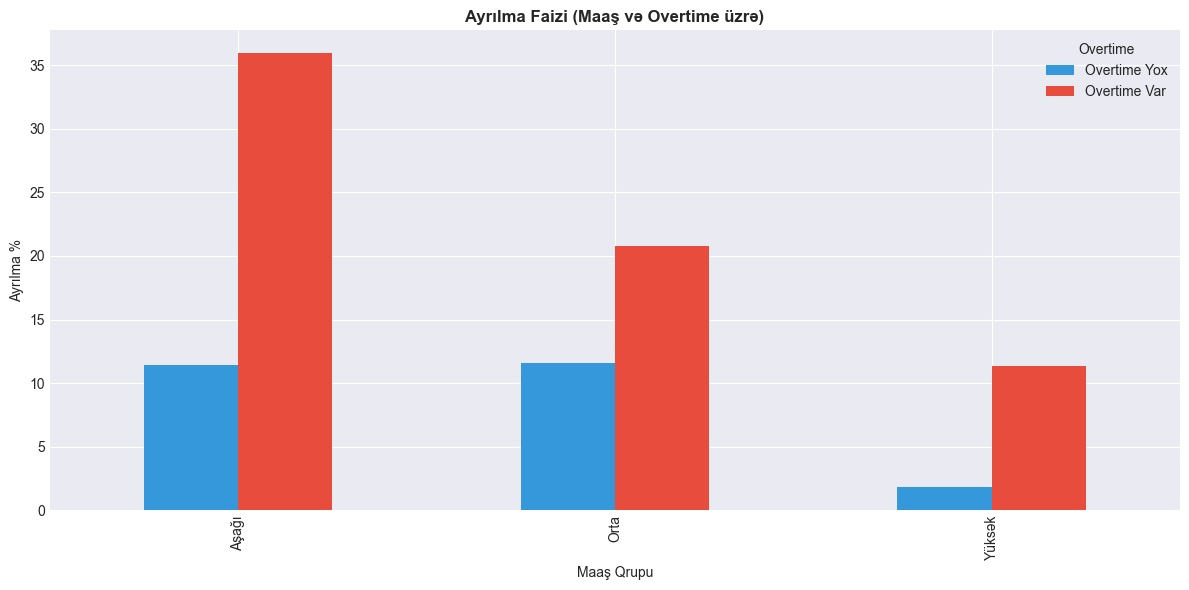

In [84]:
df['Salary_Group'] = pd.cut(df['MonthlyIncome'], bins=3, labels=['Aşağı', 'Orta', 'Yüksək'])
salary_overtime_attrition = pd.crosstab([df['Salary_Group'], df['OverTime']], df['Attrition'], normalize='index') * 100
salary_overtime_attrition['Yes'].unstack().plot(kind='bar', color=['#3498db', '#e74c3c'])

plt.title('Ayrılma Faizi (Maaş və Overtime üzrə)', fontweight='bold', fontsize=12)
plt.xlabel('Maaş Qrupu')
plt.ylabel('Ayrılma %')
plt.legend(['Overtime Yox', 'Overtime Var'], title='Overtime')
plt.tight_layout()
plt.show()
